# 합성곱 신경망(CNN)

In [1]:
# 필요한 모듈 임포트 및 필요한 설정
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import sklearn  # scikit-learn 모듈 임포트

import tensorflow as tf
from tensorflow import keras

# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
seed = 11
rng = np.random.default_rng(seed)
tf.random.set_seed(seed) # tensorflow에서 랜덤 요소 재현을 위해 seed 값 설정

# 그래프에서 한글을 사용하려면 아래 설정을 해야 함
# 원하는 글꼴의 경로를 fname에 지정
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/batang.ttc').get_name()  # 바탕체
rc('font', family=font_name)

## 환경 준비

In [2]:
# 실습 환경 설정을 수행하지 않았다면 이미지 관련 모듈(Pillow)을 설치해야 함. (실습 환경 설정을 수행한 경우는 이미 설치되어 있으므로 설치 불필요)
# 설치하려면 아래 커멘트를 해제.
#!conda install -n mlclass Pillow

## 합성곱 연산

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image

# 샘플 이미지 로딩
# 각 이미지는 3차원 배열로 구성됨. 배열 모양: (높이, 너비, 채널)
# 채널은 컬러 이미지인 경우 3, 흑백 이미지인 경우 1.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

# 위 두 이미지로 구성된 샘플 집합(미니배치) 생성
# 미니배치는 4차원 배열이 되며 모양은 (미니배치 크기, 높이, 너비, 채널).
images = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = images.shape

print(images.shape)

(2, 427, 640, 3)


In [4]:
print(china)

[[[0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  ...
  [0.98039216 0.98431373 1.        ]
  [0.98039216 0.98431373 1.        ]
  [0.98039216 0.98431373 1.        ]]

 [[0.6745098  0.78039216 0.89803922]
  [0.67843137 0.78431373 0.90196078]
  [0.67843137 0.78431373 0.90196078]
  ...
  [0.98431373 0.98823529 1.        ]
  [0.98431373 0.98823529 1.        ]
  [0.98431373 0.98823529 1.        ]]

 [[0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  ...
  [0.98823529 0.99215686 1.        ]
  [0.98823529 0.99215686 1.        ]
  [0.98823529 0.99215686 1.        ]]

 ...

 [[0.34509804 0.31372549 0.02745098]
  [0.57647059 0.54117647 0.27058824]
  [0.47843137 0.45490196 0.14901961]
  ...
  [0.15294118 0.16470588 0.12941176]
  [0.03137255 0.05490196 0.00784314]
  [0.02352941 0.04705882 0.        ]]

 [[0.47843137 0.43921569 0.16078431]
  [0.50588235 0.47058824 0.20784314]


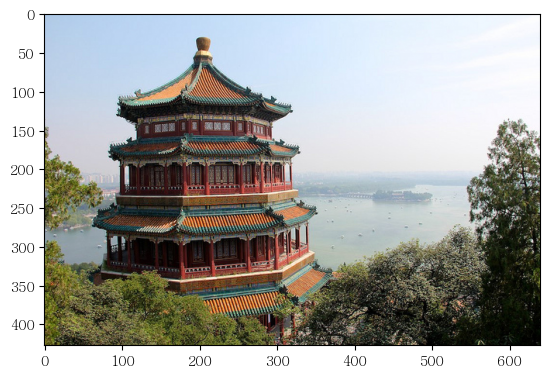

In [5]:
plt.imshow(china)
plt.show()

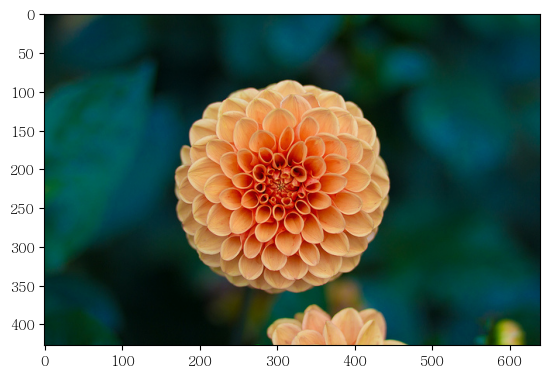

In [6]:
plt.imshow(flower)
plt.show()

In [7]:
# 7*7 크기의 필터(커널) 2개 생성
# 필터: 4차원 배열; shape=(필터 높이, 필터 너비, 입력 채널, 출력 채널)
# 출력 채널: 커널 개수(출력 특성 맵 개수)
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 수직선 필터 (7*7 커널 중 4번째 열만 1)
filters[3, :, :, 1] = 1  # 수평선 필터 (7*7 커널 중 4번째 행만 1)

# 텐서플로 저수준 딥러닝 API인 tf.nn.conv2d() 함수를 사용하여 필터 적용
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") # 스트라이드=1, 제로패딩 사용
outputs.shape

TensorShape([2, 427, 640, 2])

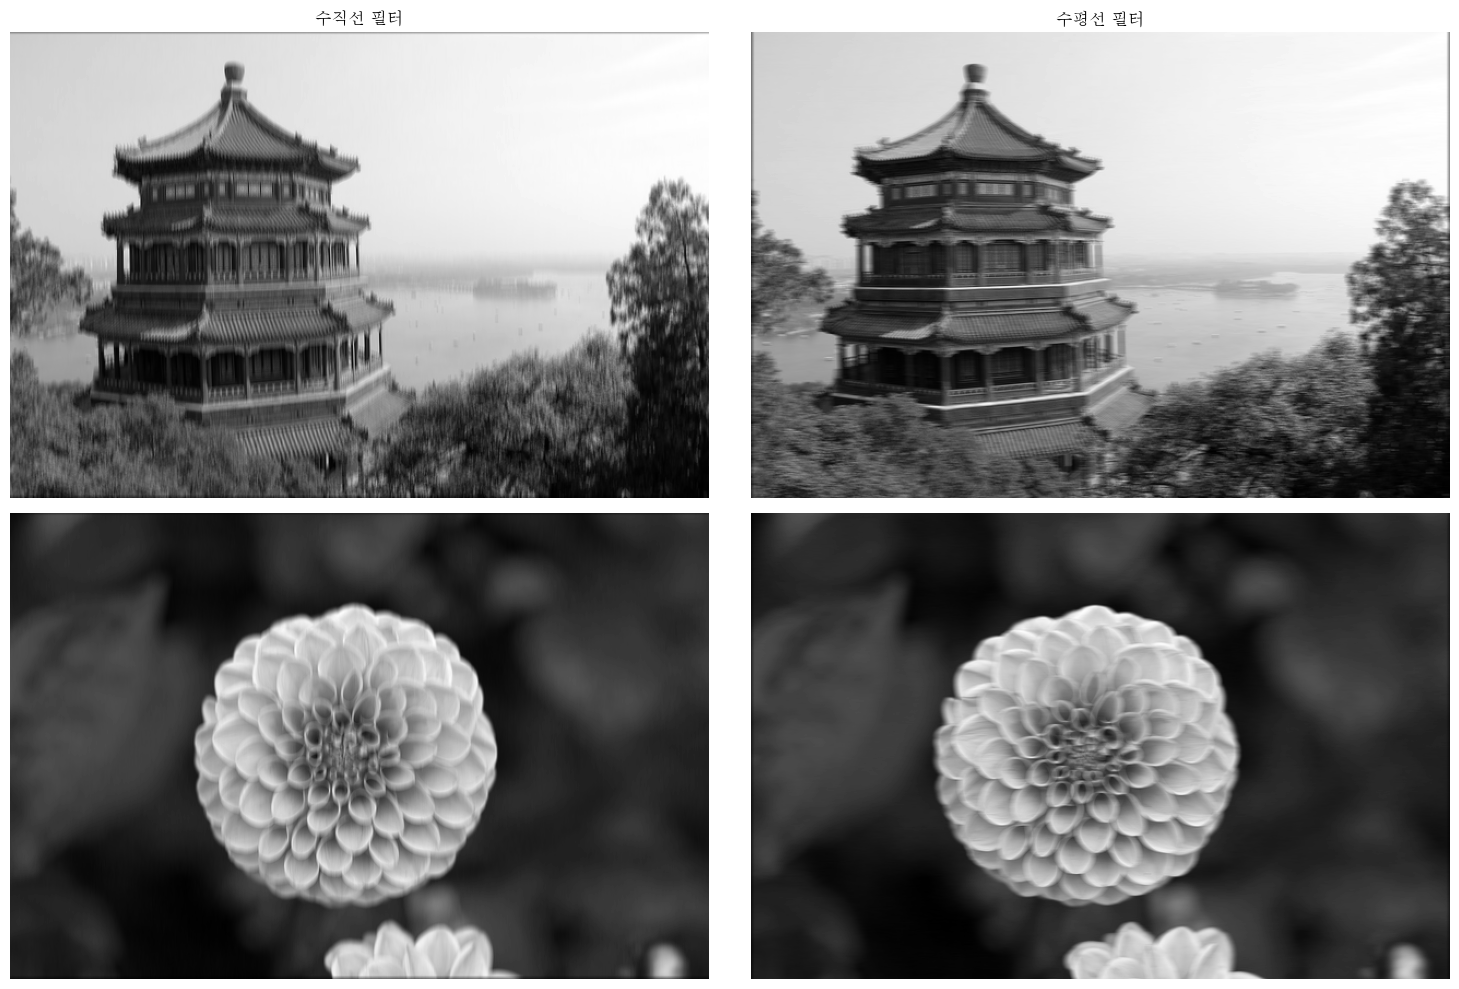

In [8]:
# 적용 결과 시각화
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(outputs[0, :, :, 0], cmap="gray")
plt.title('수직선 필터')
plt.axis("off")

plt.subplot(222)
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.title('수평선 필터')
plt.axis("off")

plt.subplot(223)
plt.imshow(outputs[1, :, :, 0], cmap="gray")
plt.axis("off")

plt.subplot(224)
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## 합성곱 층

In [9]:
# 합성곱 층 생성: 3*3 필터 32개로 구성된 층
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="same", activation="relu")
# 합성곱 층 적용
outputs = conv(images)

outputs.shape

TensorShape([2, 427, 640, 32])

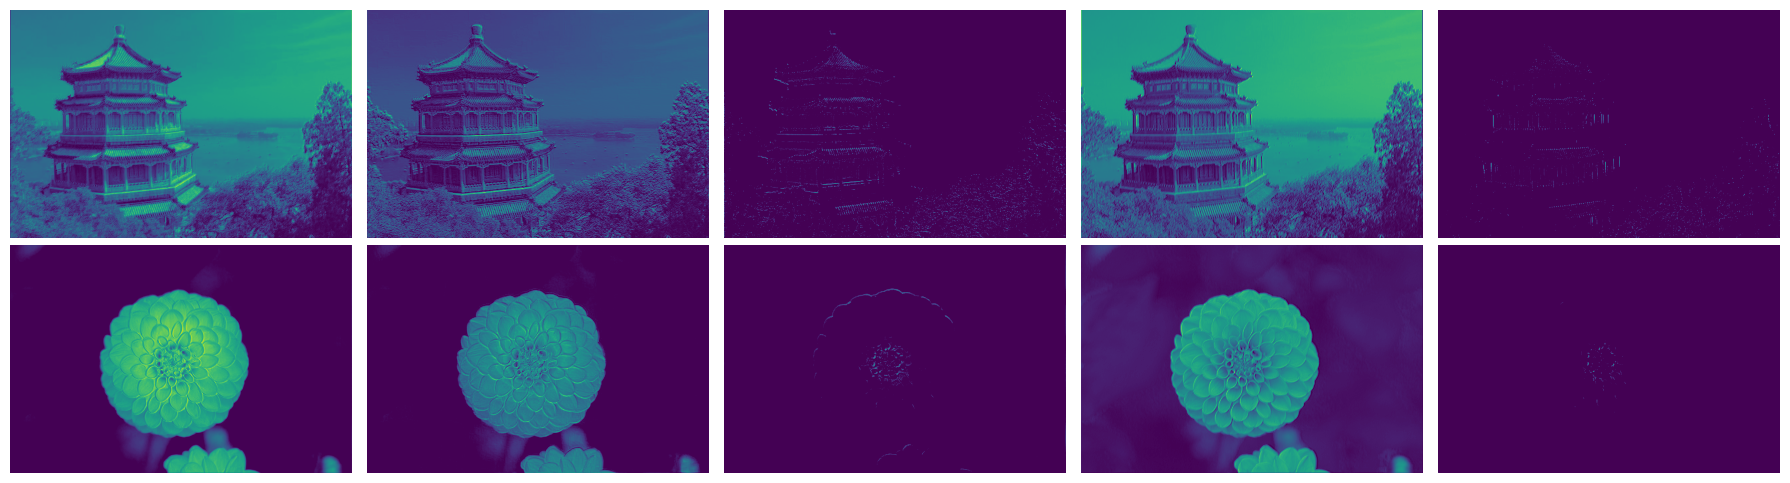

In [10]:
# 적용 결과 시각화(5개씩만)
plt.figure(figsize=(18, 5))
for image_index in (0, 1):
    for feature_map_index in range(5):
        plt.subplot(2, 5, image_index * 5 + feature_map_index + 1)
        plt.imshow(outputs[image_index, :, :, feature_map_index])
        plt.axis('off')
plt.tight_layout()
plt.show()

## 풀링 층

(2, 427, 640, 3) (2, 213, 320, 3)


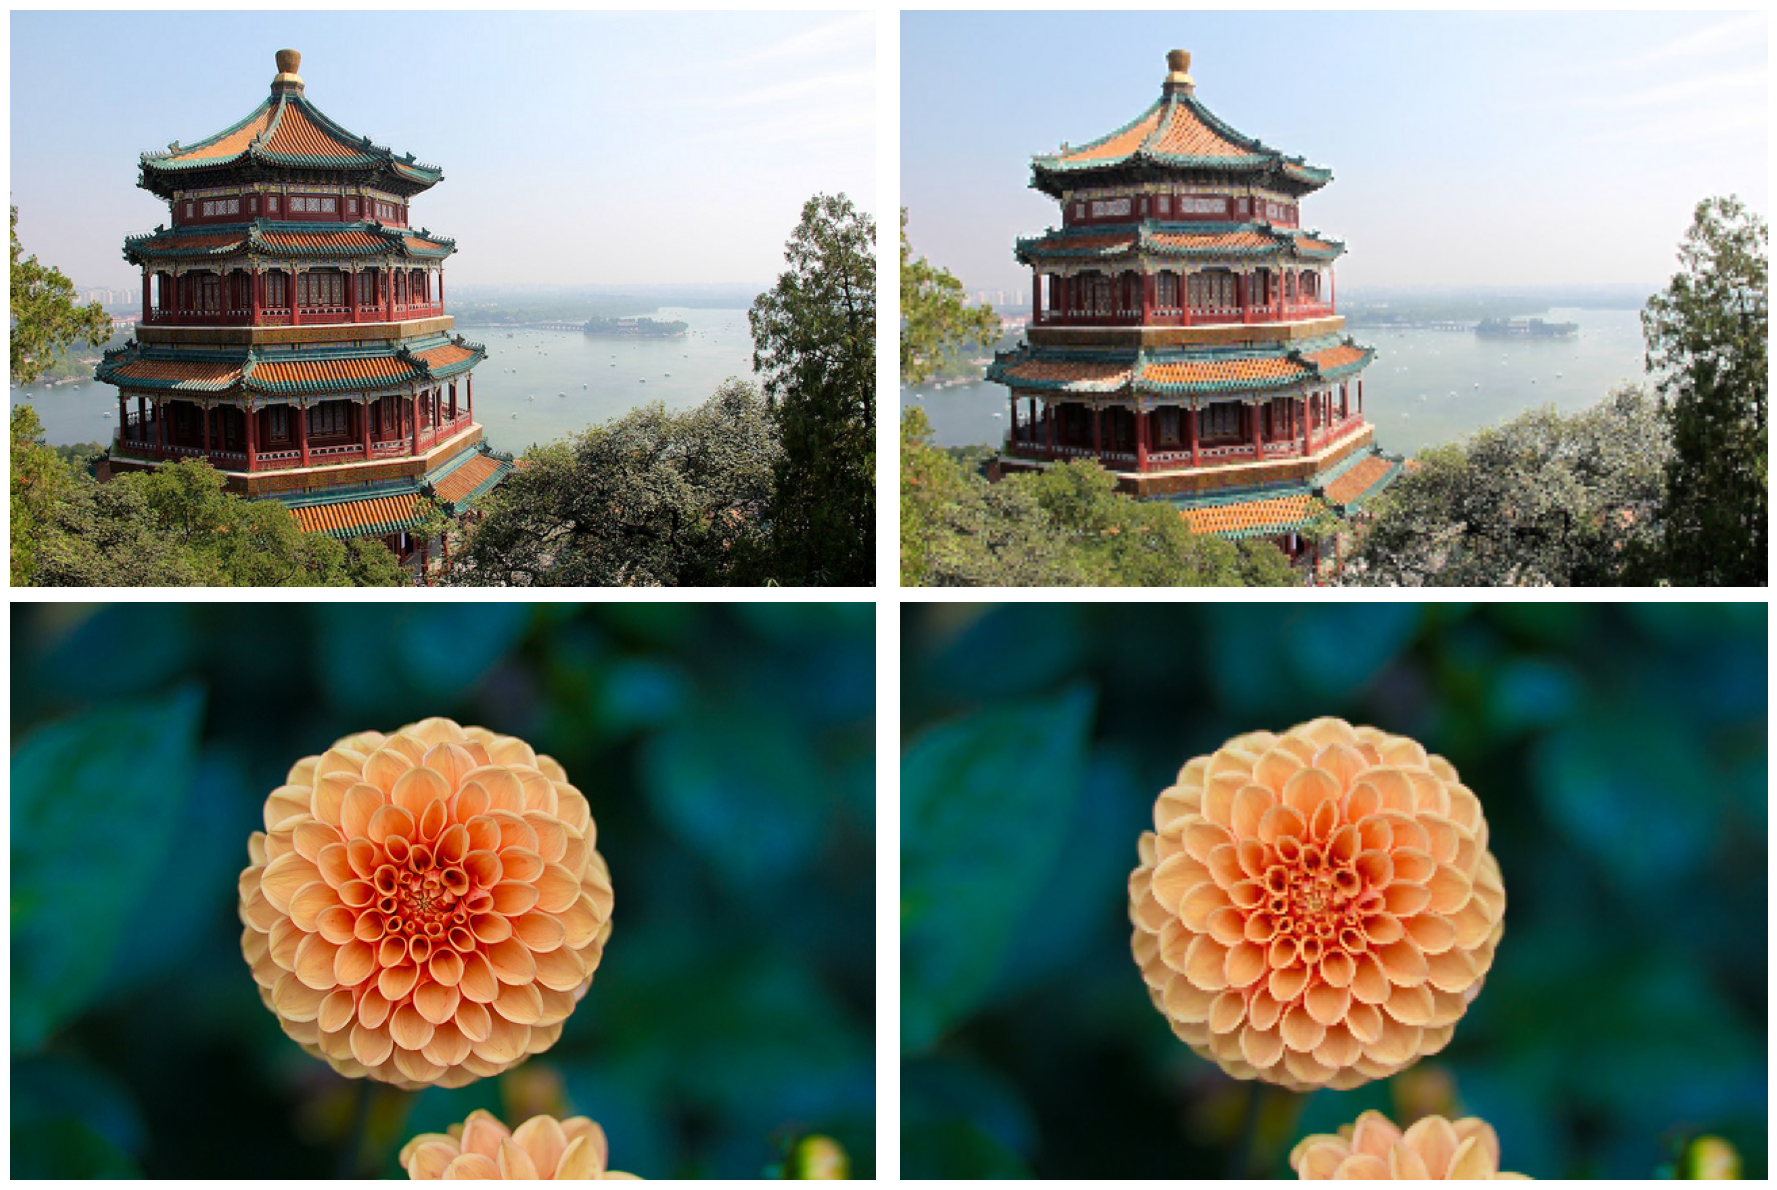

In [11]:
# 맥스 풀링 층 정의: 2*2 커널
# 파라미터 기본값: strides=None, padding='valid'
# strides=None이면 strides로 pool_size가 사용됨.
max_pool = keras.layers.MaxPool2D(pool_size=2)
outputs = max_pool(images)
print(images.shape, outputs.shape)

# 적용 결과 시각화
plt.figure(figsize=(18, 12))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        if feature_map_index == 0:
            plt.imshow(images[image_index])
        else:
            plt.imshow(outputs[image_index])
        plt.axis('off')
plt.tight_layout()
plt.show()

(2, 427, 640, 3) (2, 213, 320, 3)


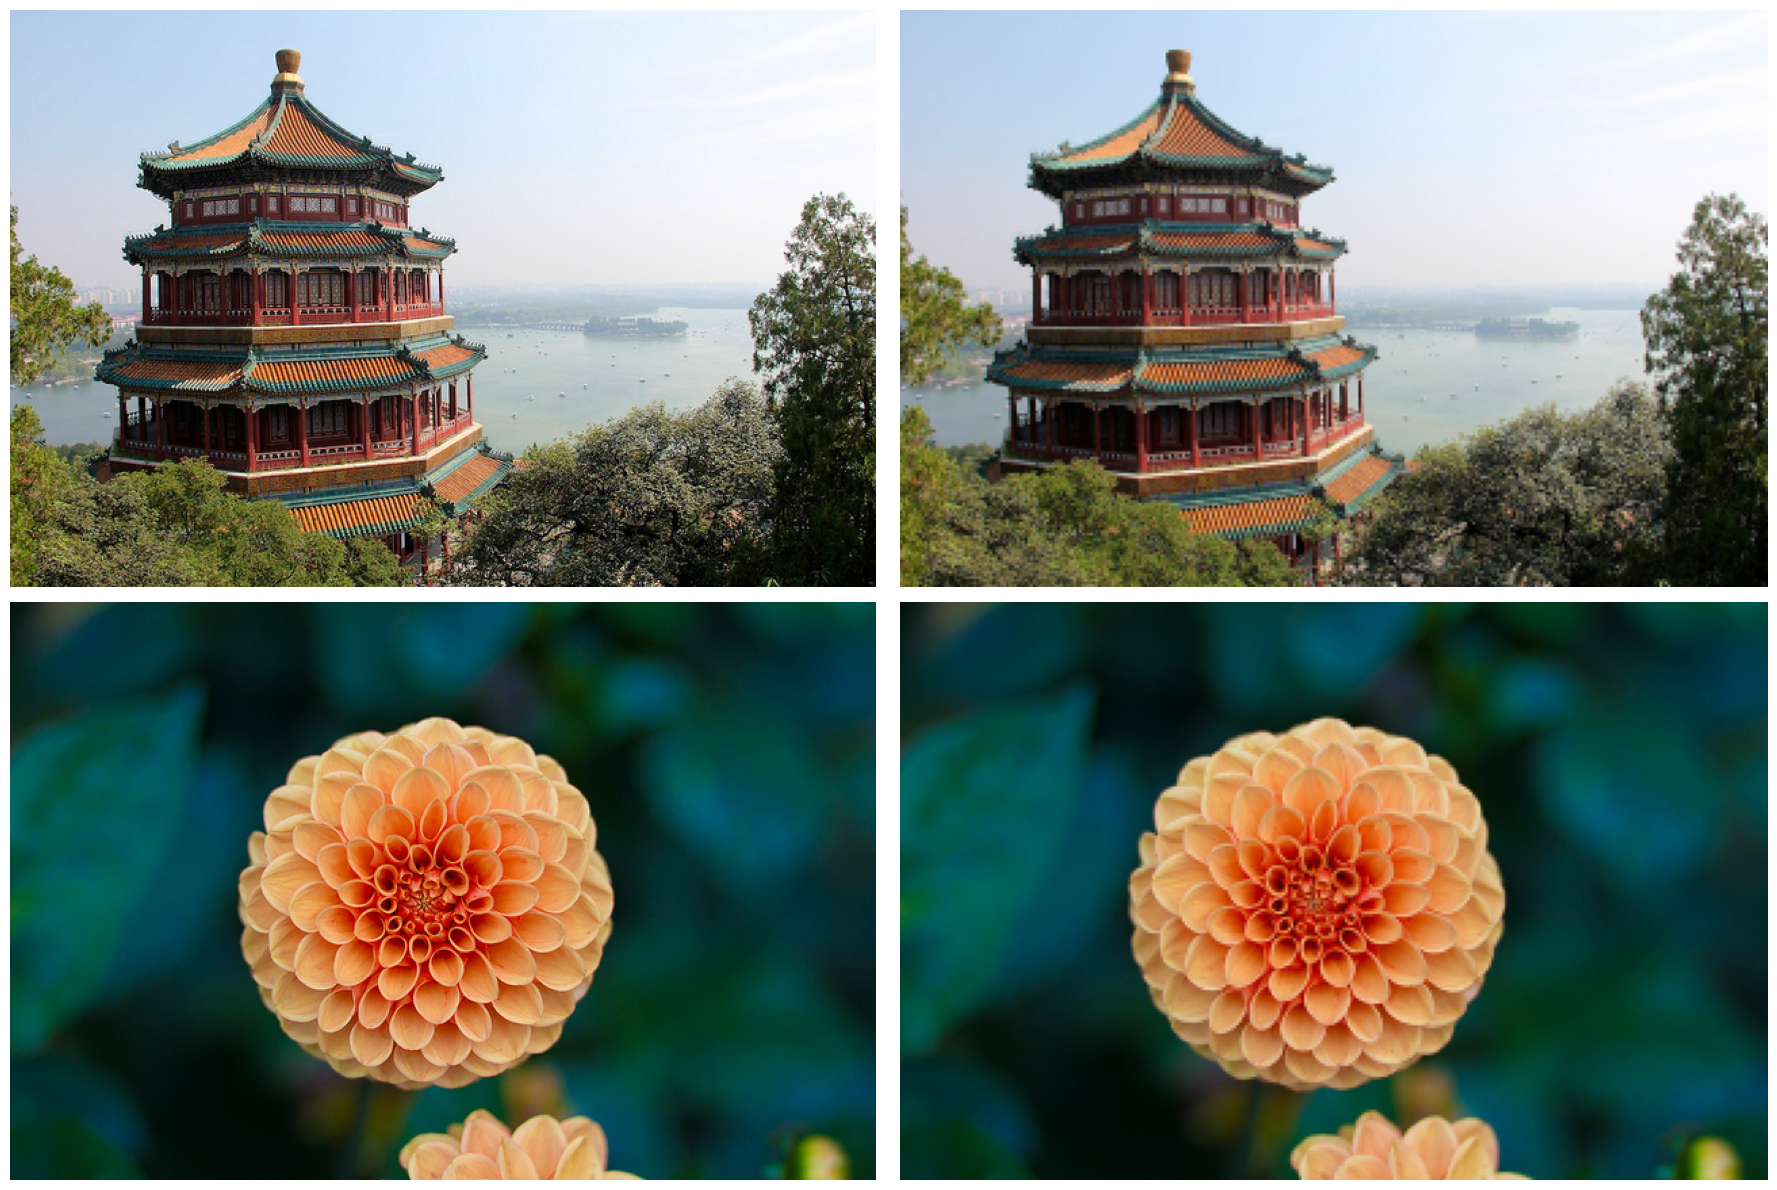

In [12]:
# 평균 풀링 층 정의: 2*2 커널
avg_pool = keras.layers.AvgPool2D(pool_size=2)
outputs = avg_pool(images)
print(images.shape, outputs.shape)

# 적용 결과 시각화
plt.figure(figsize=(18, 12))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        if feature_map_index == 0:
            plt.imshow(images[image_index])
        else:
            plt.imshow(outputs[image_index])
        plt.axis('off')
plt.tight_layout()
plt.show()

## CNN으로 패션 MNIST 분류

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print(X_train.shape)

# 채널 축 하나 추가
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape)

# one-hot 인코딩으로 변환
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)
y_test = keras.utils.to_categorical(y_test)

(55000, 28, 28)
(55000, 28, 28, 1)


In [14]:
from functools import partial

# 동일한 파라미터로 호출하는 작업을 간단히 하기 위해 파라미터가 미리 세팅된 함수의 별칭 생성
# 3*3 커널 크기, 활성화 함수: ReLU, 가중치 초기화: 균등분포 기반의 He 초기화, 제로패딩 사용
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same')

model = keras.models.Sequential([
    # 아래 코드는 
    # keras.layers.Conv2D(flters=64, kernel_size=7, input_shape=[28, 28, 1], activation='relu', kernel_initializer='he_uniform', padding='same')
    # 와 동일한 코드임.
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # 2차원을 1차원으로 변환하여 밀집층으로 연결
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 256)         2

### 파라미터 개수 계산

* 첫번째 컨볼루션 층
  - 입력 크기: (28, 28, 1) -> 28*28 크기의 특성맵의 채널이 하나
  - 커널 크기: (7, 7, 64) -> 7*7 크기의 커널이 64개
  - 파라미터 개수: 커널 하나가 갖는 연결 가중치 개수 7 * 7 = 49개. 총 64개의 커널이 있으므로 연결 가중치 전체 개수는 7 * 7 * 64 = 3,136개. 편향은 커널마다 하나씩 존재하므로 편향은 총 64개. 따라서 전체 파라미터 개수는 3,136 + 64 = 3,200개


* 두번째 컨볼루션 층
  - 입력 크기: (14, 14, 64) -> 28*28 크기의 특성맵의 채널이 64개
  - 커널 크기: (3, 3, 128) -> 3*3 크기의 커널이 128개
  - 파라미터 개수: 128개의 커널의 연결 가중치 개수는 3 * 3 * 128 = 1,152개. 이 가중치가 특성맵의 각 채널마다 학습되므로 연결 가중치의 총 개수는 3 * 3 * 128 * 64 = 73,728개. 편향은 128개. 따라서 전체 파라미터 개수는 73,728 + 128 = 73,856개

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# 체크포인트 콜백 정의: 검증 집합에서 이전 모델보다 성능이 더 좋을 때만 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint("fashion_mnist_cnn.h5", save_best_only=True)

# 조기 종료 콜백 정의: 일정 에포크(patience) 동안 검증 집합에 대한 점수가 향상되지 않으면 학습 종료.
#                      최상의 모델 복원.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 88s 50ms/step - loss: 0.7056 - accuracy: 0.7557 - val_loss: 0.3550 - val_accuracy: 0.8756
Epoch 2/100
1719/1719 [==============================] - 90s 52ms/step - loss: 0.3970 - accuracy: 0.8667 - val_loss: 0.3035 - val_accuracy: 0.8876
Epoch 3/100
1719/1719 [==============================] - 81s 47ms/step - loss: 0.3339 - accuracy: 0.8879 - val_loss: 0.2554 - val_accuracy: 0.9064
Epoch 4/100
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2957 - accuracy: 0.8993 - val_loss: 0.2677 - val_accuracy: 0.9056
Epoch 5/100
1719/1719 [==============================] - 81s 47ms/step - loss: 0.2767 - accuracy: 0.9050 - val_loss: 0.2628 - val_accuracy: 0.9120
Epoch 6/100
1719/1719 [==============================] - 82s 47ms/step - loss: 0.2560 - accuracy: 0.9105 - val_loss: 0.2415 - val_accuracy: 0.9130
Epoch 7/100
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2429 - accuracy: 0.9163 - val_loss: 0

In [16]:
# 테스트 집합으로 성능 평가
score = model.evaluate(X_test, y_test)
print(score)

X_new = X_test[:10]
y_pred = model.predict(X_new)
print(y_pred)

313/313 [==============================] - 5s 15ms/step - loss: 0.2788 - accuracy: 0.9073
[0.27883467078208923, 0.9072999954223633]
1/1 [==============================] - 0s 146ms/step
[[2.03370088e-21 1.93766965e-30 6.06045746e-18 6.84314953e-20
  1.97212524e-19 2.92731839e-09 9.75896701e-20 5.20226877e-06
  9.41913552e-22 9.99994695e-01]
 [1.84507834e-12 1.03973724e-32 9.99998152e-01 2.53579199e-22
  6.98550595e-09 0.00000000e+00 1.82628924e-06 2.14434552e-38
  1.90332819e-27 1.06177308e-34]
 [1.36324925e-31 9.99999940e-01 2.24436220e-31 3.69851325e-28
  1.40465462e-35 0.00000000e+00 3.18488627e-30 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.71570277e-32 9.99999940e-01 2.63787824e-29 6.62376612e-28
  7.13256177e-33 0.00000000e+00 3.05674874e-29 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.36890952e-03 8.30428120e-14 3.62327119e-04 1.00714497e-05
  2.83756905e-04 1.60961048e-13 9.89975035e-01 3.29265662e-16
  2.55389687e-09 7.71499716e-15]
 [1.44081204e-24 9.99999940e-0

## 사전 학습된 모델 사용하기
tf.keras.applications을 통해 다양한 사전 학습된 모델을 사용할 수 있음. https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [17]:
# ImageNet 데이터셋에 사전 학습된 ResNet-50 모델 로딩
model = keras.applications.resnet50.ResNet50(weights="imagenet")

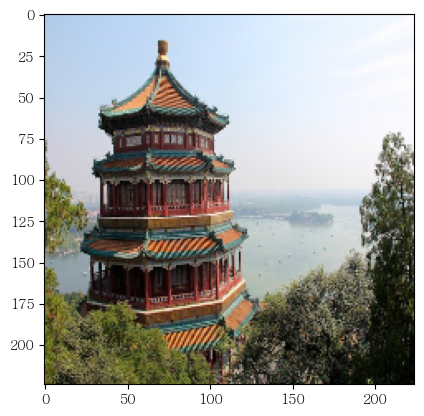

In [18]:
# ResNet-50 모델은 224*224 크기의 이미지로 학습되었으므로, 이미지 크기 변경
images_resized = tf.image.resize(images, [224, 224])
plt.imshow(images_resized[0])
plt.show()

In [19]:
# 이미지 전처리
# 이 함수는 픽셀 값이 0~255 사이로 가정함.
# 위에서 픽셀 값을 0~1로 바꾸었기 때문에 다시 255를 곱해서 전달함.
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [20]:
Y_proba.shape

(2, 1000)

In [21]:
# 예측 결과 디코딩
# decode_predictions는 (클래스ID, 클래스 설명, 점수) 튜플의 리스트를 리턴함.
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba * 100:.2f}%")
    print()

Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.95%
  n02206856 - bee          4.35%

